<div align="center">
  <h2>Міністерство освіти і науки України</h2>
  <h2>Національний технічний університет України</h2>
  <h2>«Київський політехнічний інститут ім. Ігоря Сікорського»</h2>
  <h2>Факультет інформатики та обчислювальної техніки</h2>
  <h2>Кафедра обчислювальної техніки</h2>
  <br>
</div>

<div align="right">
    <br>
    <br>
<center>    
<h2>Лабораторна робота №4</h2>
</center>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
    <br>
Виконав: <br>
Студент ІІ курсу ФІОТ <br>
групи ІО-34 <br>
Рибачок Михайло Володимирович <br>
Номер у списку - 17 <br><br>

<center>
Київ - 2025
</center>

## Розв’язування задачі лінійної регресії 

## Мета лабораторної роботи: 
Навчитися працювати з простою моделлю лінійної регресії. 

# Практична реалізація: 
Відпрацювати на реальних даних послідовність дій, 
які є необхідними для вирішення задачі лінійної регресії. 

In [8]:
# Завантаження датасету для Data Cleaning з kaggle для виконання лабораторної роботи
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Mishanya\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


In [11]:
# Підкючення потрібних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Перевірка датасету
# Читаємо весь наявний набір даних
data_origin = pd.read_csv("Salary_dataset.csv")
data_origin

Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  101303.0
23          23              8.3  113813.0
24          24              8.8  109432.0
25          25              9.1  105583.0
26          26              9.6  116970.0
27          27              9.7  112636.0
28          28             10.4  122392.0
29          29             10.6  121873.0

In [9]:
#Перевіряємо розмір, дані на відсутність
print(data_origin.shape)
data_origin.info()

(30, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


Text(0, 0.5, 'Зарплата')

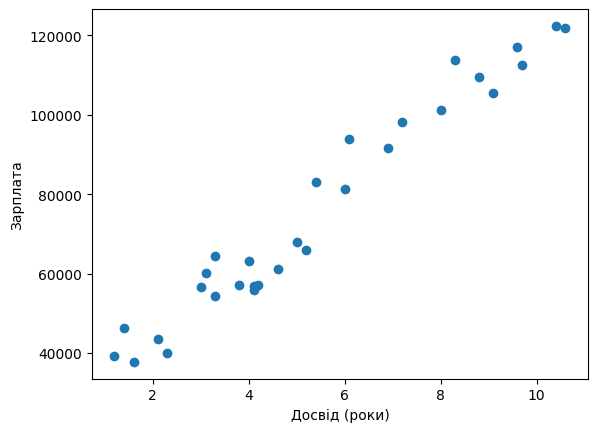

In [33]:
# Візуалізація Досвіду роботи до зарплати
plt.scatter(data_origin["YearsExperience"], data_origin["Salary"]) 
plt.xlabel("Досвід (роки)")
plt.ylabel("Зарплата")

In [21]:
# Виділення координат у numpy масив для зручності
X = data_origin["YearsExperience"].values
Y = data_origin["Salary"].values

In [23]:
# Обчислення середніх значень
x_mean = np.mean(X)
y_mean = np.mean(Y)

5.413333333333332 76004.0


In [26]:
#   Обчислення коефіцієнтів лінійної регресії
# Формула для нахилу a:
#   a = Σ((xi - x̄)(yi - ȳ)) / Σ((xi - x̄)²)
a = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
a

9449.962321455076

In [25]:
# Формула для вільного члена b:
#   b = ȳ - a * x̄
b = y_mean - a * x_mean
b

24848.2039665232

In [29]:
#Побудова регресійної прямої
# Задаємо діапазон x для побудови прямої
x_range = np.linspace(X.min(), X.max(), 30)
y_pred = a * x_range + b  # прогнозовані значення

array([ 36188.15875227,  39251.2499875 ,  42314.34122273,  45377.43245796,
        48440.52369319,  51503.61492842,  54566.70616365,  57629.79739888,
        60692.88863411,  63755.97986934,  66819.07110457,  69882.1623398 ,
        72945.25357503,  76008.34481026,  79071.43604549,  82134.52728072,
        85197.61851595,  88260.70975118,  91323.80098641,  94386.89222164,
        97449.98345687, 100513.0746921 , 103576.16592734, 106639.25716257,
       109702.3483978 , 112765.43963303, 115828.53086826, 118891.62210349,
       121954.71333872, 125017.80457395])

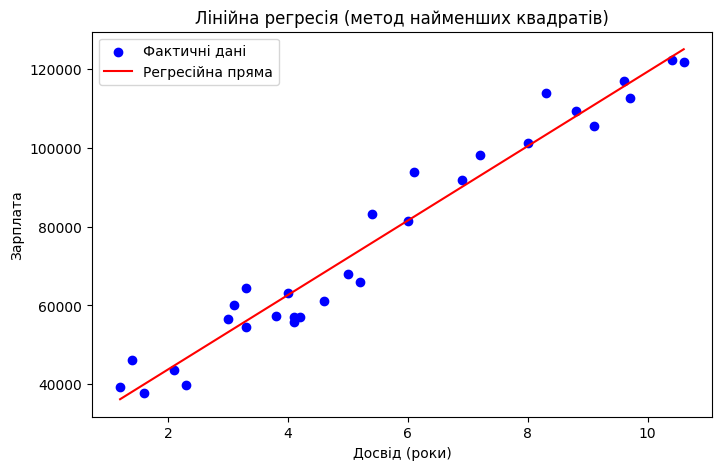

In [35]:
# Візуалізація
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color="blue", label="Фактичні дані")   # точки з датасету
plt.plot(x_range, y_pred, color="red", label="Регресійна пряма")  # лінія
plt.xlabel("Досвід (роки)")
plt.ylabel("Зарплата")
plt.title("Лінійна регресія (метод найменших квадратів)")
plt.legend()

## Лінійна регресія з допомогою sklearn

In [38]:
# Підлючення потрібного інстументарію
from sklearn.linear_model import LinearRegression

In [45]:
# Дані для роботи з sklearn
X1 = data_origin[["YearsExperience"]]
Y2 = data_origin["Salary"]

In [46]:
# Лінійна регресія через sklearn
model = LinearRegression()
model.fit(X1, Y2)

LinearRegression()

In [49]:
# Прогноз
x_range1 = pd.DataFrame(np.linspace(X1.min(), X1.max(), 30), columns=["YearsExperience"])
y_pred1 = model.predict(x_range1)

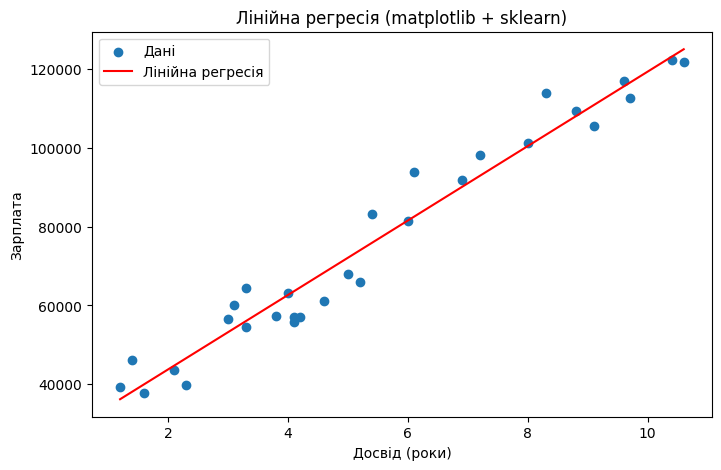

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(X1, Y2, label="Дані")
plt.plot(x_range1, y_pred1, color="red", label="Лінійна регресія")
plt.xlabel("Досвід (роки)")
plt.ylabel("Зарплата")
plt.title("Лінійна регресія (matplotlib + sklearn)")
plt.legend()